# Nobel Prize Project

# Nobel Prize Project

---

The **Nobel Prize** has been among the most prestigious international awards since **1901**. Each year, prizes are awarded in the following categories:

- **Chemistry**
- **Literature**
- **Physics**
- **Physiology or Medicine**
- **Economics**
- **Peace**

In addition to the honor, prestige, and substantial prize money, each recipient also receives a gold medal featuring an image of **Alfred Nobel** (1833–1896), who established the prize.

<p align="center">
  <img src="Nobel_Prize.png" alt="Nobel Prize Medal" width="300"/>
</p>

---

The **Nobel Foundation** has made available a dataset of all prize winners from the outset of the awards (1901) through 2023.  
The dataset used in this project is sourced from the Nobel Prize API and is available as:

- **File:** `nobel.csv`
- **Location:** `data` folder

---



Most commonly awarded gender: Male
Most commonly awarded birth country: United States of America
0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996    False
997    False
998    False
999     True
Name: is_US_winner, Length: 1000, dtype: bool
0      1900
1      1900
2      1900
3      1900
4      1900
       ... 
995    2020
996    2020
997    2020
998    2020
999    2020
Name: decade, Length: 1000, dtype: int64
    decade         year  laureate_id  is_US_winner
0     1900  1905.035088   301.087719      0.017544
1     1910  1913.775000   296.800000      0.075000
2     1920  1924.703704   314.611111      0.074074
3     1930  1934.571429   312.946429      0.250000
4     1940  1946.069767   330.534884      0.302326
5     1950  1954.541667   312.625000      0.291667
6     1960  1964.683544   343.227848      0.265823
7     1970  1974.711538   391.990385      0.317308
8     1980  1984.546392   389.298969      0.319588
9     1990  1994.644231   439.7

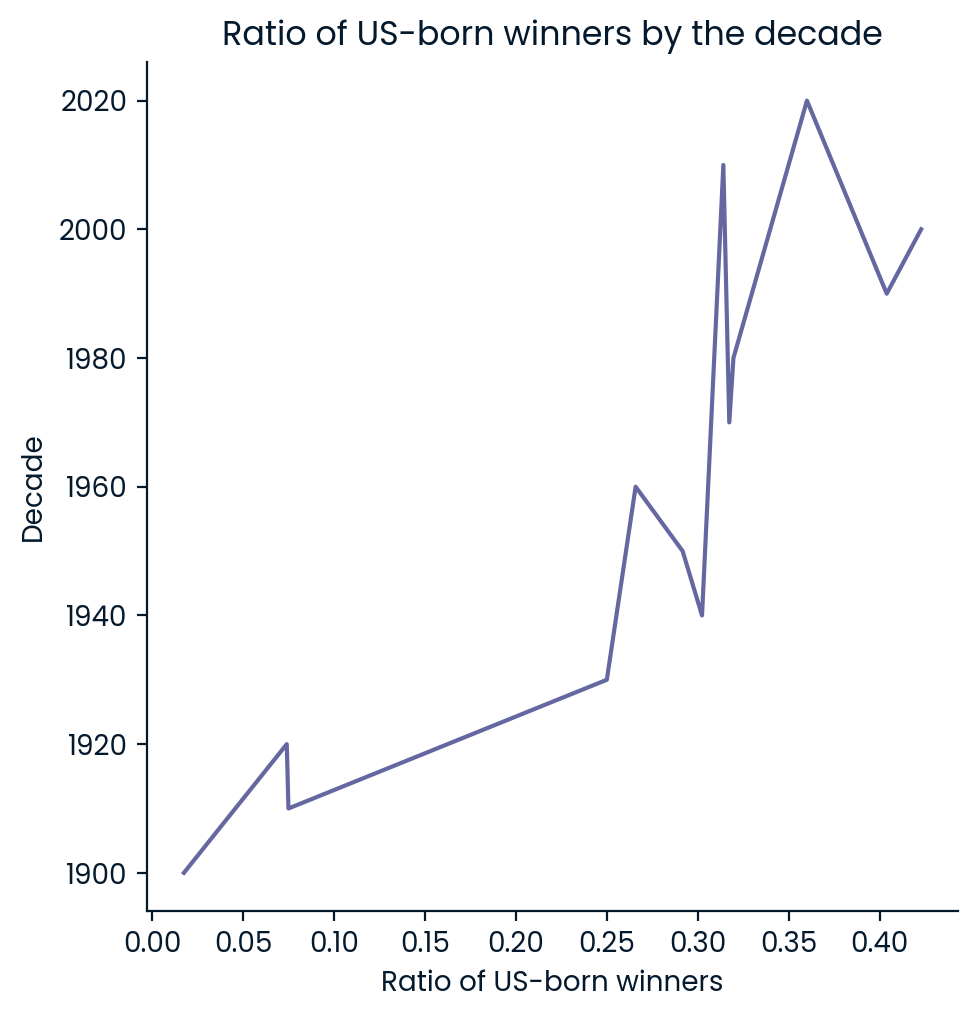

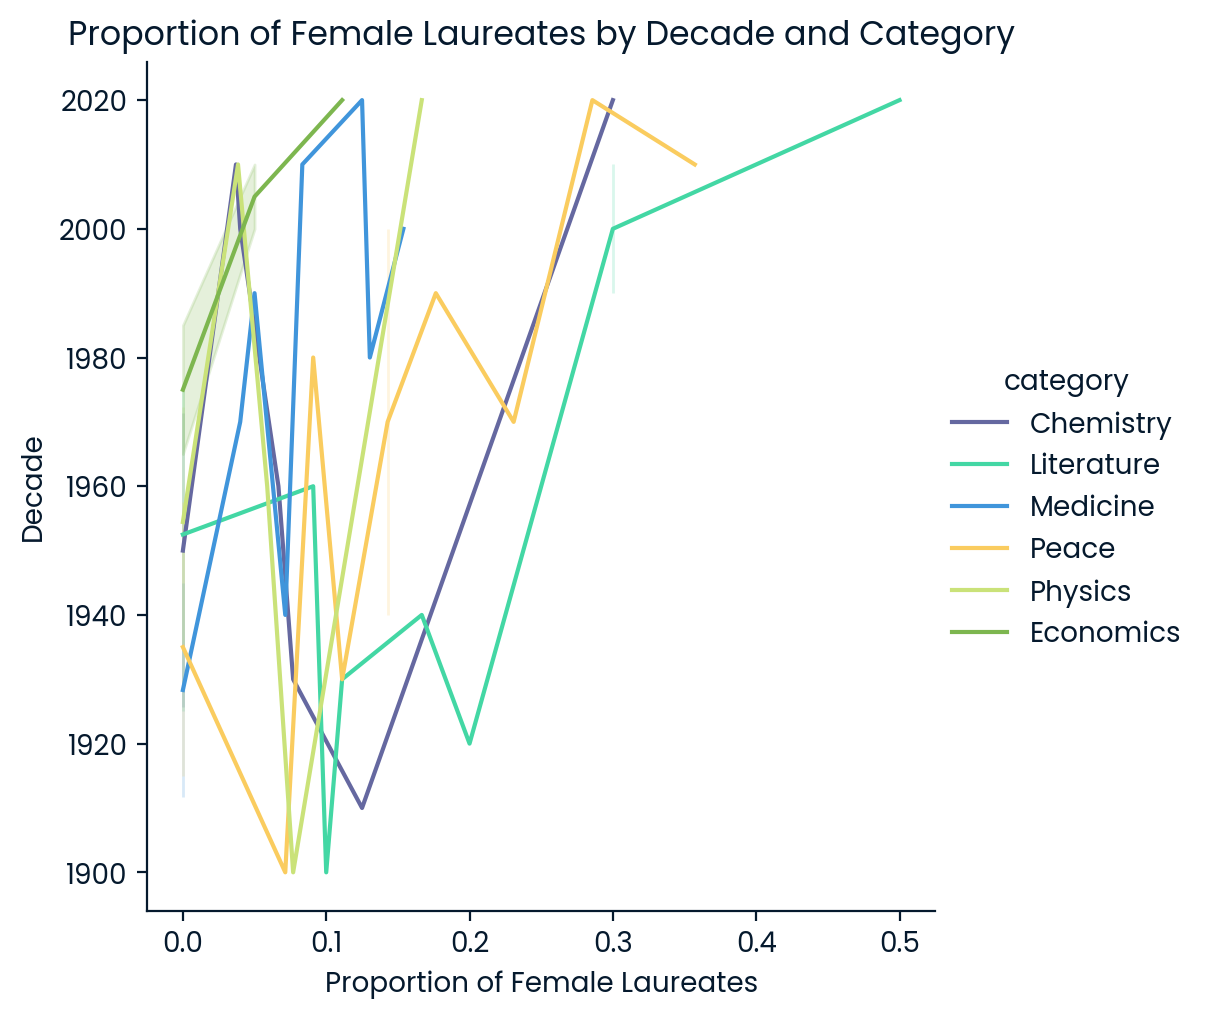

Marie Curie, née Sklodowska
Physics
['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


In [66]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!
nobel_df = pd.read_csv("data/nobel.csv")
nobel_df

#1. What is the most commonly awarded gender and birth country?
top_gender = nobel_df['sex'].value_counts().index[0]
top_country = nobel_df['birth_country'].value_counts().index[0]

print("Most commonly awarded gender: " + top_gender)
print("Most commonly awarded birth country: " + top_country)

# 2. Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
# flag column for winners of USA
nobel_df['is_US_winner'] = [True if x == 'United States of America' else False for x in nobel_df['birth_country']]
print(nobel_df['is_US_winner'])

# decade column
nobel_df['decade'] = np.floor([x/10 for x in nobel_df['year']]) #year in the decade column should end with 0
nobel_df['decade'] = [x * 10 for x in nobel_df['decade']] #getting the four-digit year value
nobel_df['decade'] = nobel_df['decade'].astype(int) #getting the type
print(nobel_df['decade'])

# Finding the ratio
winner_by_year = nobel_df.groupby('decade', as_index = False).mean('is_US_winner')
print(winner_by_year)

# Identify decade with highest ratio of US-born winners
bst_ratio_US_wnrs = winner_by_year[winner_by_year['is_US_winner'] == winner_by_year['is_US_winner'].max()]
max_decade_usa = int(pd.to_numeric(bst_ratio_US_wnrs['decade']))
print(int(max_decade_usa))

# Relational line plot
sns.relplot(data=winner_by_year, kind='line', x='is_US_winner',y='decade')
plt.title("Ratio of US-born winners by the decade")
plt.xlabel("Ratio of US-born winners")
plt.ylabel("Decade")
plt.show()

#3. Find the decade and category with the highest proportion of female laureates
# Filtering for female winners
nobel_df['is_female_winner'] = [True if x == 'Female' else False for x in nobel_df['sex']]
fm_winner_by_decade = nobel_df.groupby(by=['decade','category'],as_index = False).mean('is_female_winner')
bst_ratio_fm_wnrs= fm_winner_by_decade[fm_winner_by_decade['is_female_winner'] == fm_winner_by_decade['is_female_winner'].max()]

# Create a dictionary
max_female_dict = {bst_ratio_fm_wnrs['decade'].values[0] : bst_ratio_fm_wnrs['category'].values[0]}

# Relational line plot with multiple categories
sns.relplot(data=fm_winner_by_decade, kind='line', x='is_female_winner', y='decade', hue='category')
plt.title("Proportion of Female Laureates by Decade and Category")
plt.xlabel("Proportion of Female Laureates")
plt.ylabel("Decade")
plt.show()

#4. Find first woman to win Nobel Prize
row = fm_winners.sort_values('year', ascending=True).iloc[0]
first_woman_name = row['full_name']     
first_woman_category = row['category']

print(first_woman_name)
print(first_woman_category)

#5. Determine repeat winners
# Count values in a column 
no_wins = nobel_df['full_name'].value_counts()
more_2_wins = no_wins[no_wins >= 2]
repeat_list = more_2_wins.index.tolist()

print(repeat_list)